In [2]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px

%matplotlib inline



ModuleNotFoundError: No module named 'geopandas'

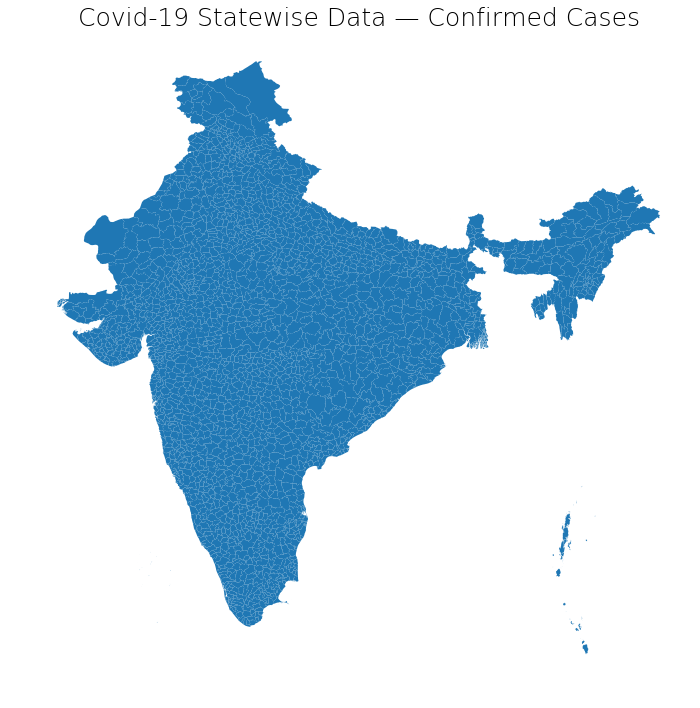

In [3]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
lsoas = gpd.read_file("IND_adm/IND_adm3.shp")

fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis("off")

ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {"fontsize": "25", "fontweight" : "3"})

# merged_data.plot(column = "Confirmed", cmap="YlOrRd", 
#                  linewidth=0.8, ax=ax, edgecolor="0", 
#                  legend = True)


lsoas.plot(ax=ax)
plt.show()

In [20]:
age_details = pd.read_csv('New_Data/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('New_Data/covid_19_india.csv')
hospital_beds = pd.read_csv('New_Data/HospitalBedsIndia.csv')
individual_details = pd.read_csv('New_Data/IndividualDetails.csv')
ICMR_details = pd.read_csv('New_Data/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('New_Data/ICMRTestingLabs.csv')
state_testing = pd.read_csv('New_Data/StatewiseTestingDetails.csv')

In [21]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'])
state_testing['Date'] = pd.to_datetime(state_testing['Date'])

In [22]:
india_covid_19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [23]:
state_details = pd.pivot_table(india_covid_19, values=['ConfirmedForeignNational','ConfirmedIndianNational','Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details = state_details.sort_values(by='Confirmed', ascending= False)
# state_details.style.background_gradient(cmap='Blues')

In [24]:
state_details["Total"] = state_details.Confirmed + state_details.Cured + state_details.Deaths

In [28]:
state_details["States/UT"] = state_details.index
state_details.sort_values(by=['States/UT'])
state_details.head()

,Confirmed,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total,States/UT
State/UnionTerritory,,,,,,,
Maharashtra,2337,3,86,229,160,2726,Maharashtra
Delhi,1510,1,9,30,28,1568,Delhi
Tamil Nadu,1173,6,7,58,11,1242,Tamil Nadu
Rajasthan,879,2,52,133,3,1015,Rajasthan
Madhya Pradesh,730,0,7,51,50,831,Madhya Pradesh


In [29]:
map_data = gpd.read_file("./India_Shape_File/Indian_States.shp")
map_data.rename(columns = {"st_nm":"States/UT"}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [30]:
map_data["States/UT"] = map_data["States/UT"].str.replace("&","and")


In [31]:
map_data["States/UT"].replace("Arunanchal Pradesh", "Arunachal Pradesh", inplace = True)
map_data["States/UT"].replace("Telangana", "Telengana", inplace = True)
map_data["States/UT"].replace("NCT of Delhi",  "Delhi", inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 'Andaman and Nicobar Islands',inplace = True)

In [32]:
merged_data = pd.merge(map_data, state_details, how = "left", on = "States/UT")

merged_data.fillna(0, inplace = True)



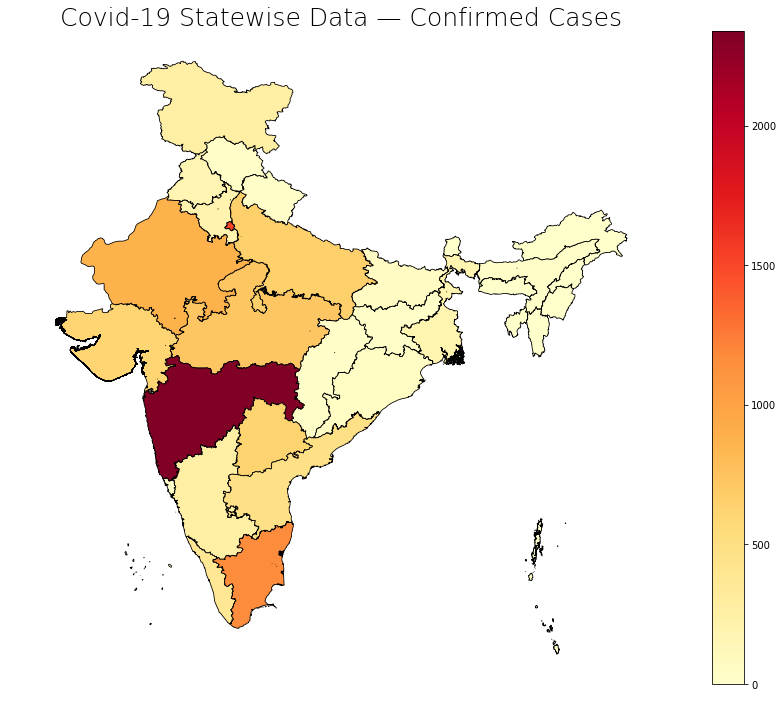

In [33]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis("off")

ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {"fontsize": "25", "fontweight" : "3"})

merged_data.plot(column = "Confirmed", cmap="YlOrRd", 
                 linewidth=0.8, ax=ax, edgecolor="0", 
                 legend = True)
plt.show()

In [ ]:
merged_data["ConfirmedIndianNational"].replace('-','0',inplace=True)
merged_data["ConfirmedIndianNational"] = merged_data["ConfirmedIndianNational"].apply(int)


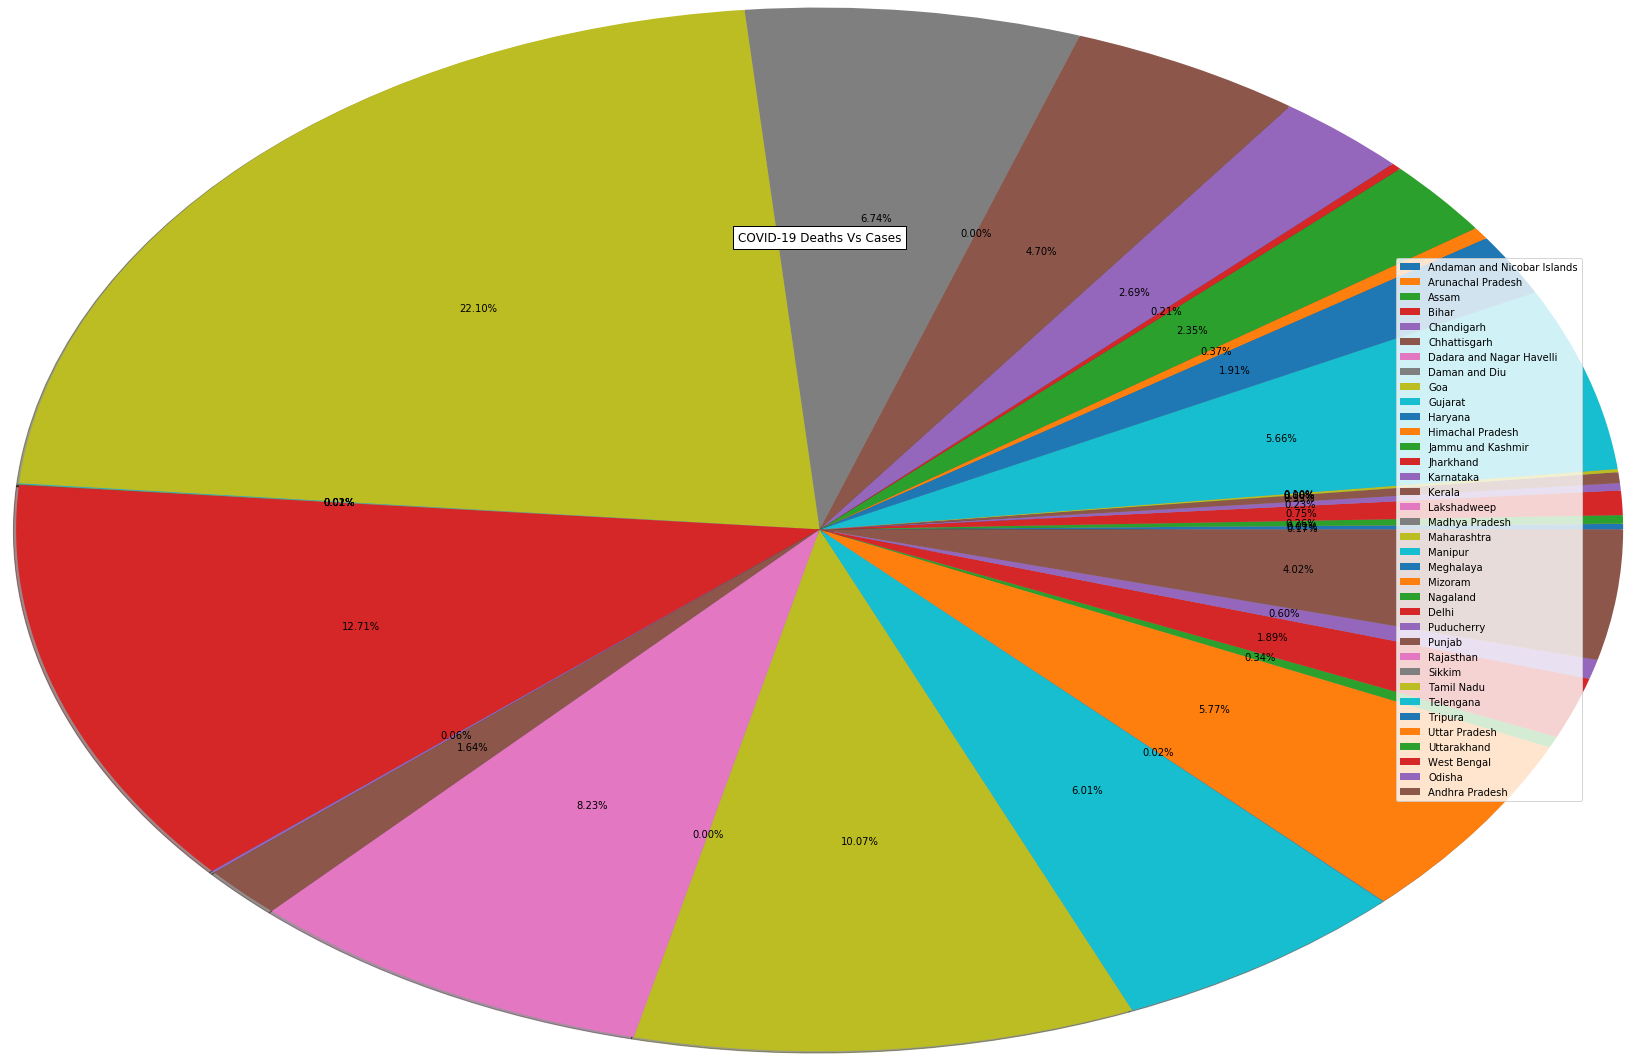

In [53]:
state = merged_data["States/UT"]
cases = merged_data["Total"]

# explode = merged_data.ConfirmedIndianNational.apply(lambda x:x > 100)
# explode = explode.apply(lambda x:0.2 if x == True else 0)

plt.title("COVID-19 Deaths Vs Cases", bbox={"facecolor":"1", "pad":5}).set_position([.5,1.8])
plt.pie(cases,autopct="%1.2f%%",shadow=True, radius=6,)
plt.legend(state, loc="center",bbox_to_anchor=(2.5, 0.5))
plt.show()

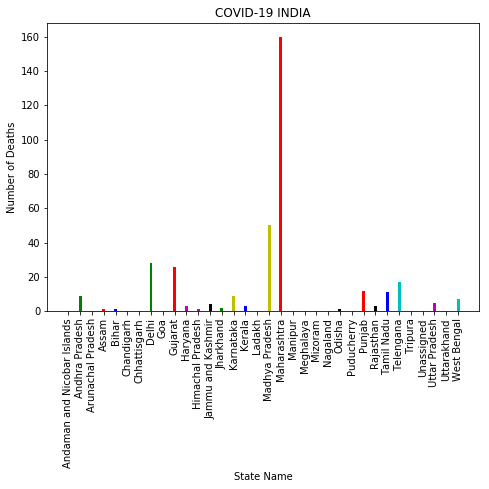

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(state_details["States/UT"],state_details["Deaths"], color = list("rgbkymc"), width = 0.25)
plt.title("COVID-19 INDIA")
plt.xticks(rotation=90)
plt.xlabel("State Name")
plt.ylabel("Number of Deaths")
plt.show()

In [1]:
merged_data.info()

NameError: name 'merged_data' is not defined